In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import sys, os

this_path = '/home/ibi/Documents/GitHub/ady201m-project'
sys.path.append(this_path)
os.chdir(this_path)

In [2]:
file_path = 'data/processed/train-data-cleaned.csv'
df = pd.read_csv(file_path)
df.head()

,Name,Automaker,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [3]:
def get_df_info(df):
    columns = df.columns
    first_non_null_values = df.apply(lambda col: col.dropna().iloc[0] if col.dropna().shape[0] > 0 else None)
    column_types = df.dtypes

    info = pd.DataFrame({
        'Column': columns,
        'First Non-Null Value': first_non_null_values,
        'Type': column_types
    }).reset_index(drop=True)

    return info

info = get_df_info(df)
info

,Column,First Non-Null Value,Type
0,Name,Maruti Wagon R LXI CNG,object
1,Automaker,Maruti,object
2,Location,Mumbai,object
3,Year,2010,int64
4,Kilometers_Driven,72000,int64
5,Fuel_Type,CNG,object
6,Transmission,Manual,object
7,Owner_Type,First,object
8,Mileage(kmpl),37.24,float64
9,Engine (CC),998,int64


In [4]:
df.describe()

,Year,Kilometers_Driven,Mileage(kmpl),Engine (CC),Power (bhp),Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.432378,1620.939359,112.757725,5.279129,9.479468
std,3.269742,9.126884e+04,4.489101,600.748742,53.753960,0.804914,11.187917
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.230000,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,46.956000,5998.000000,560.000000,10.000000,160.000000


In [5]:
def plot_distribution(df, column):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'Distribution and Box Plot of {column}', fontsize=16)

    sns.histplot(df[column], bins=20, kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')

    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title(f'Box Plot of {column}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

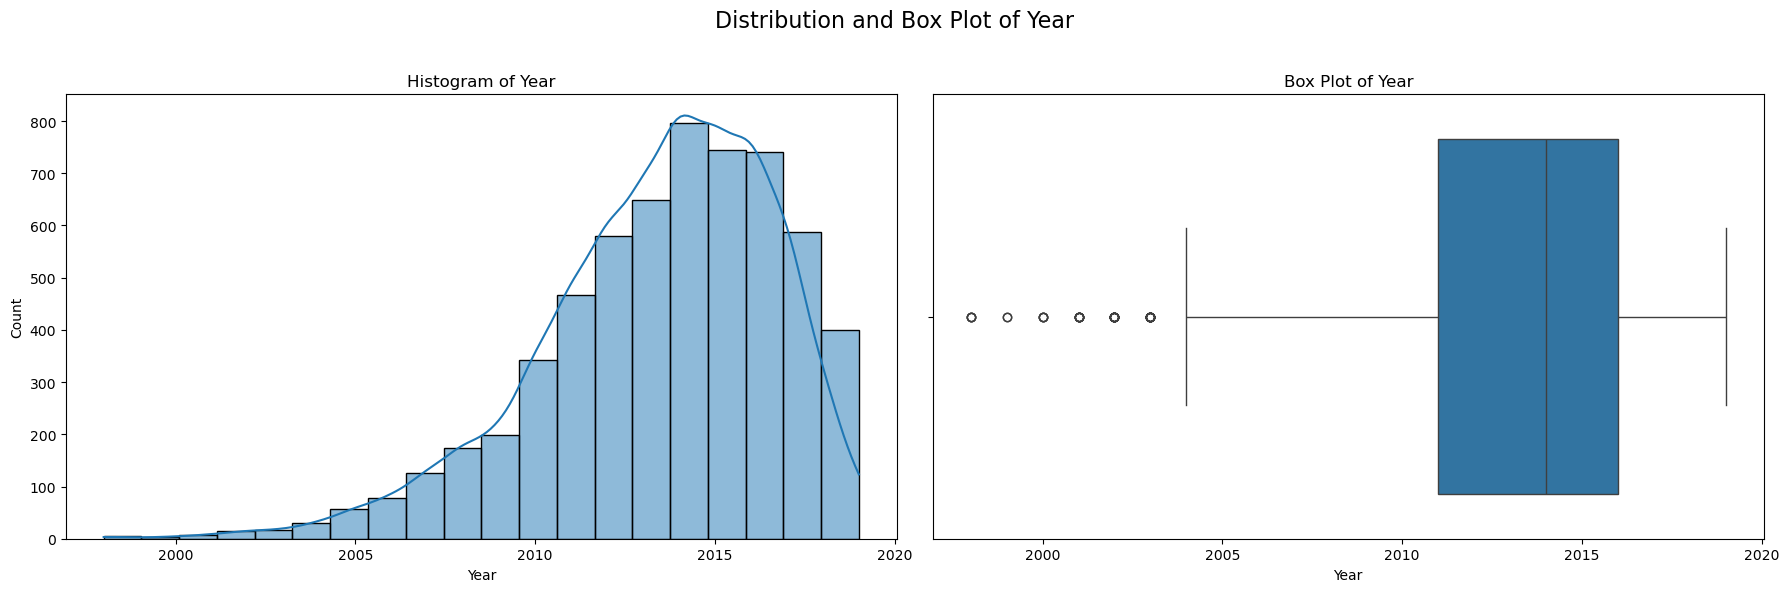

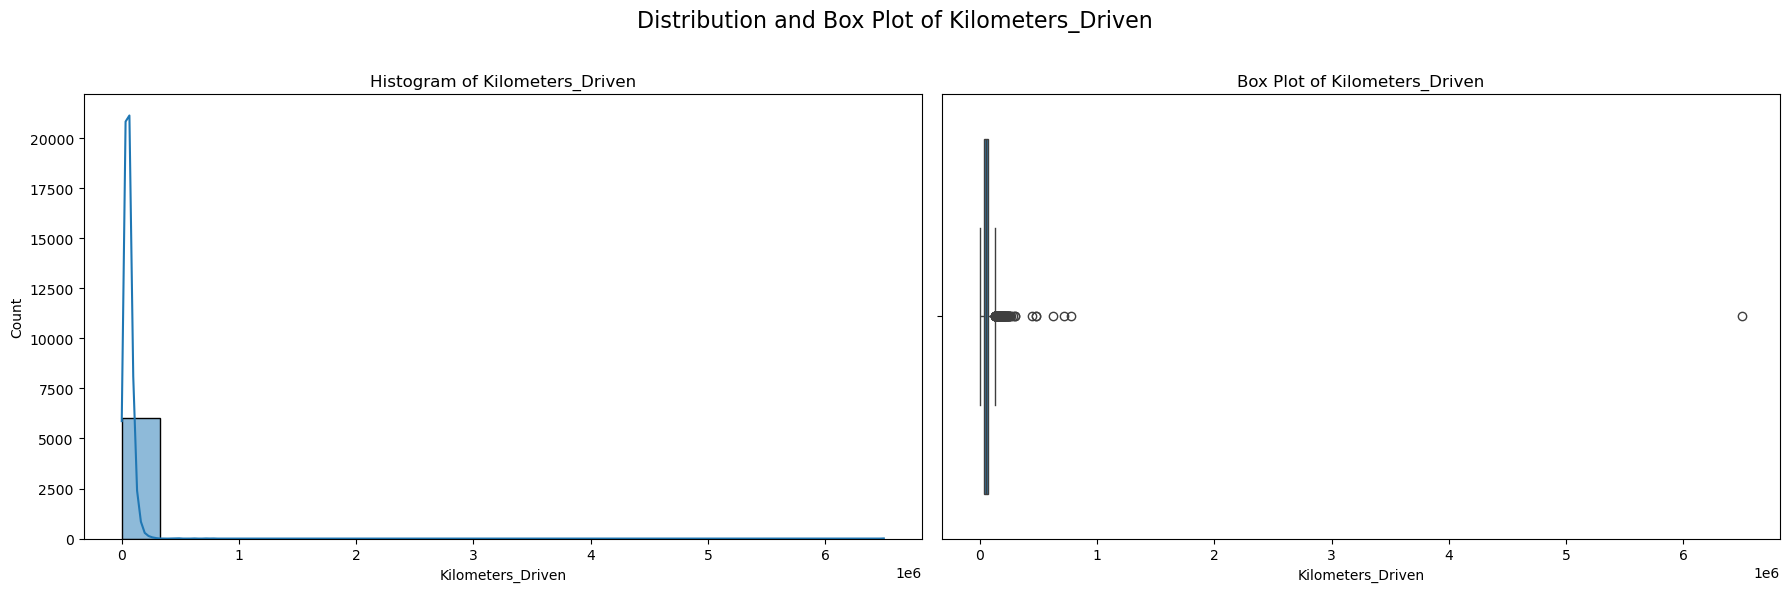

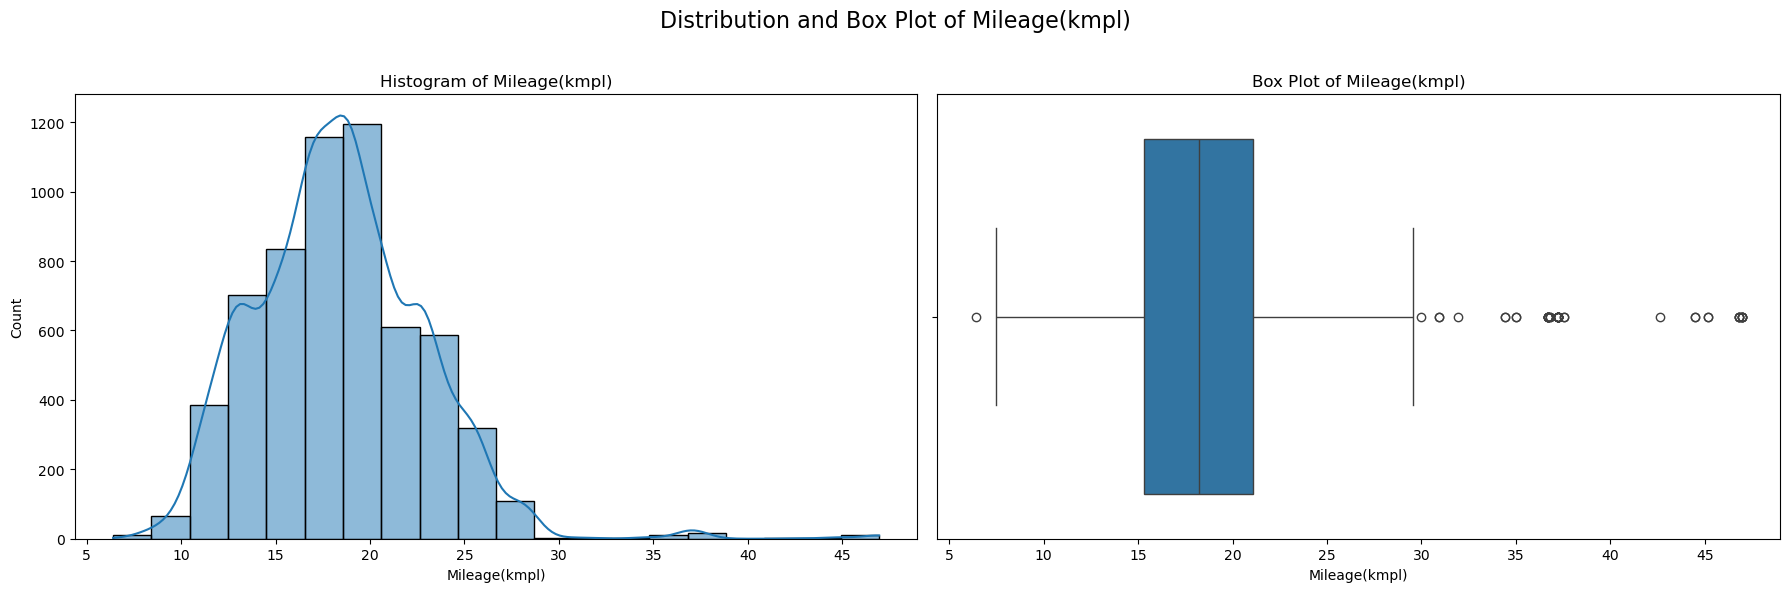

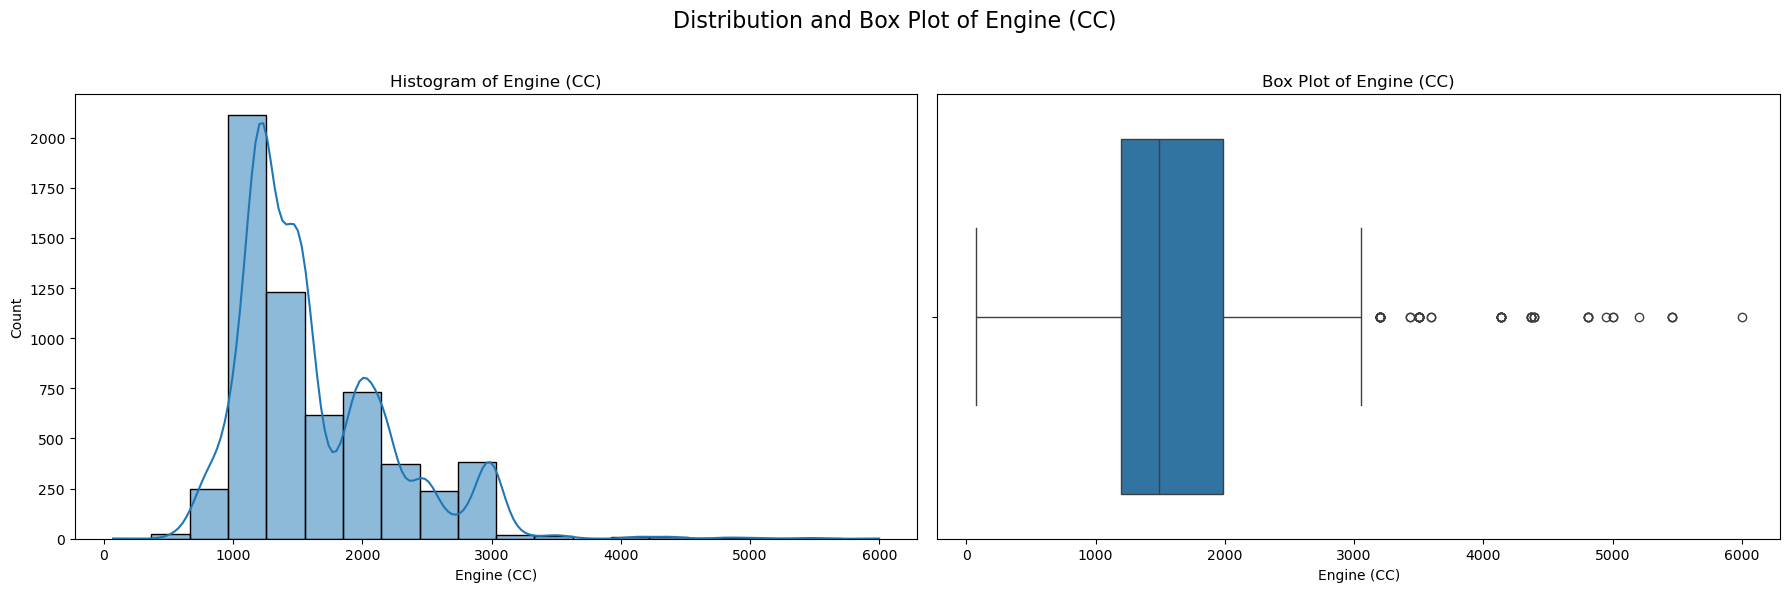

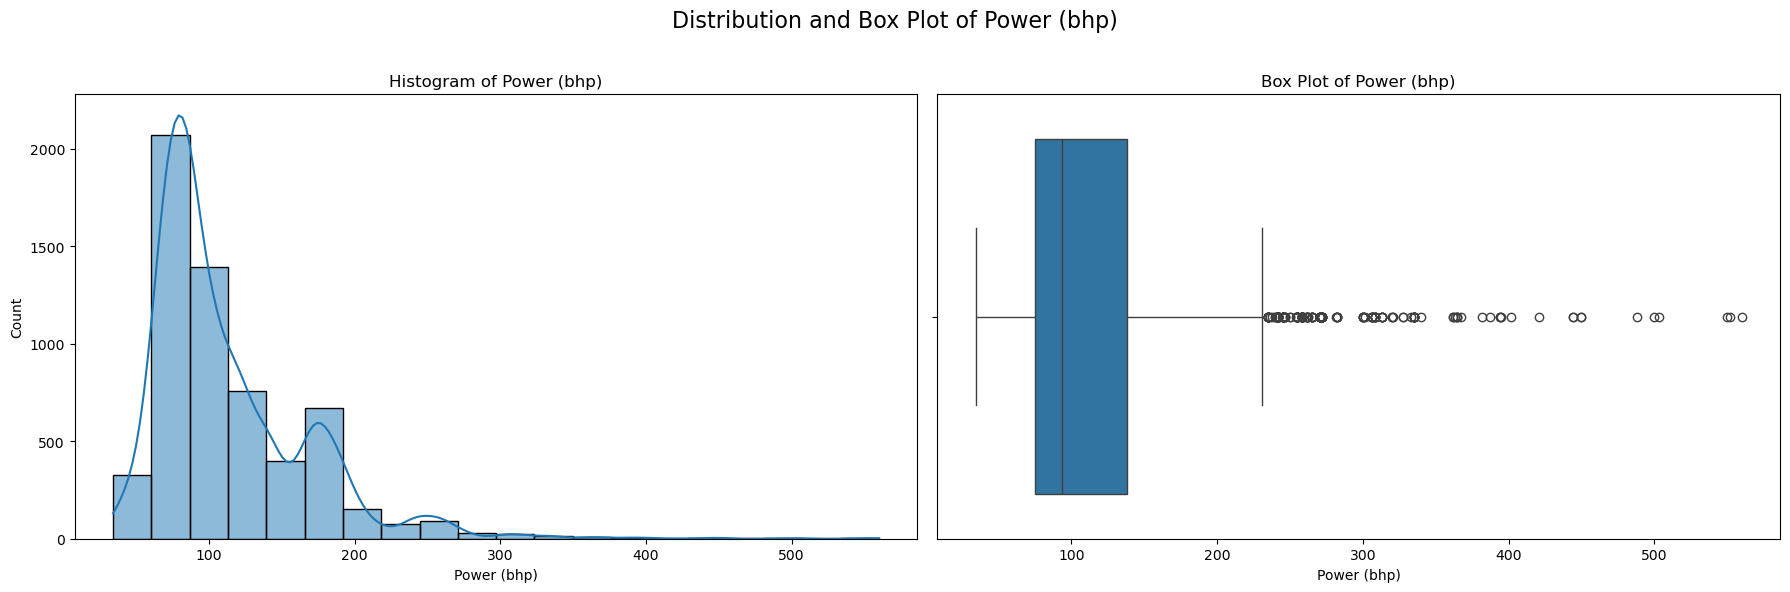

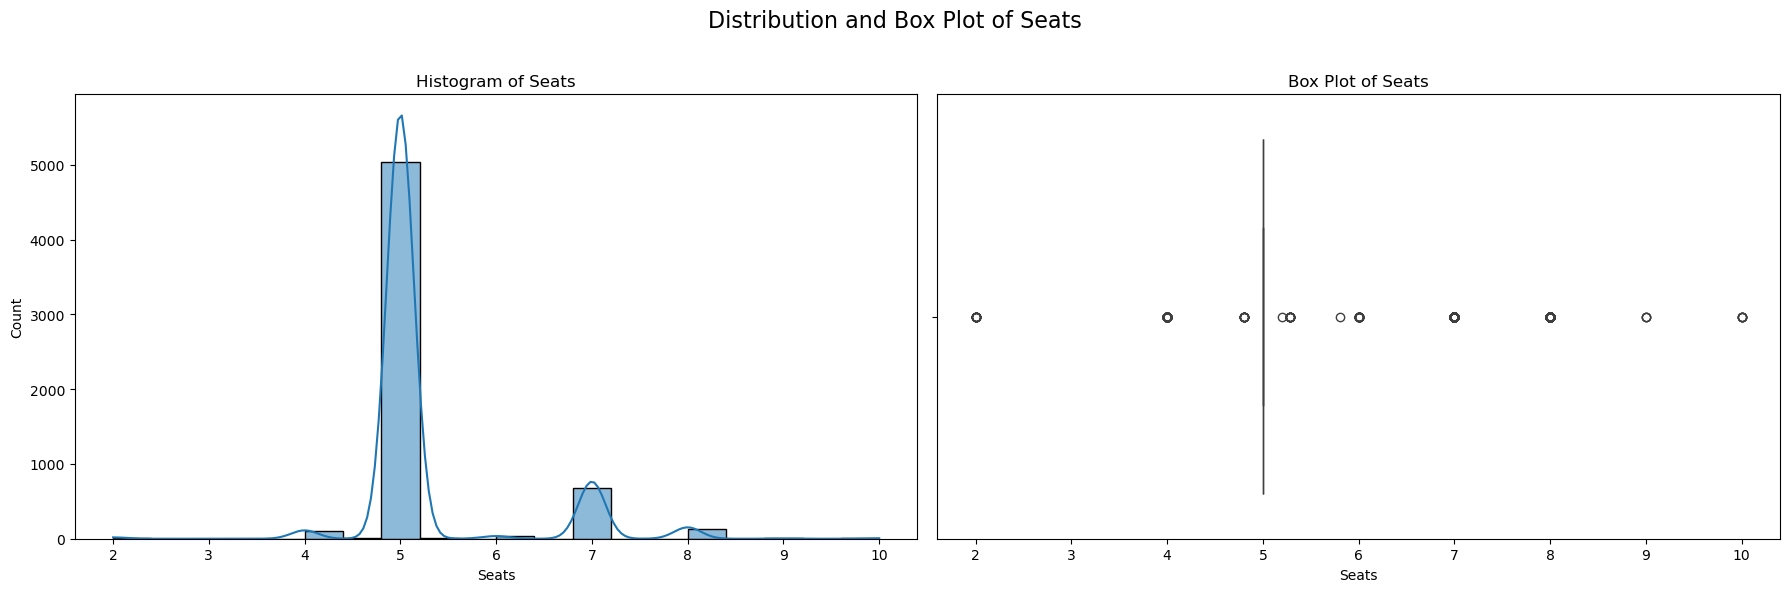

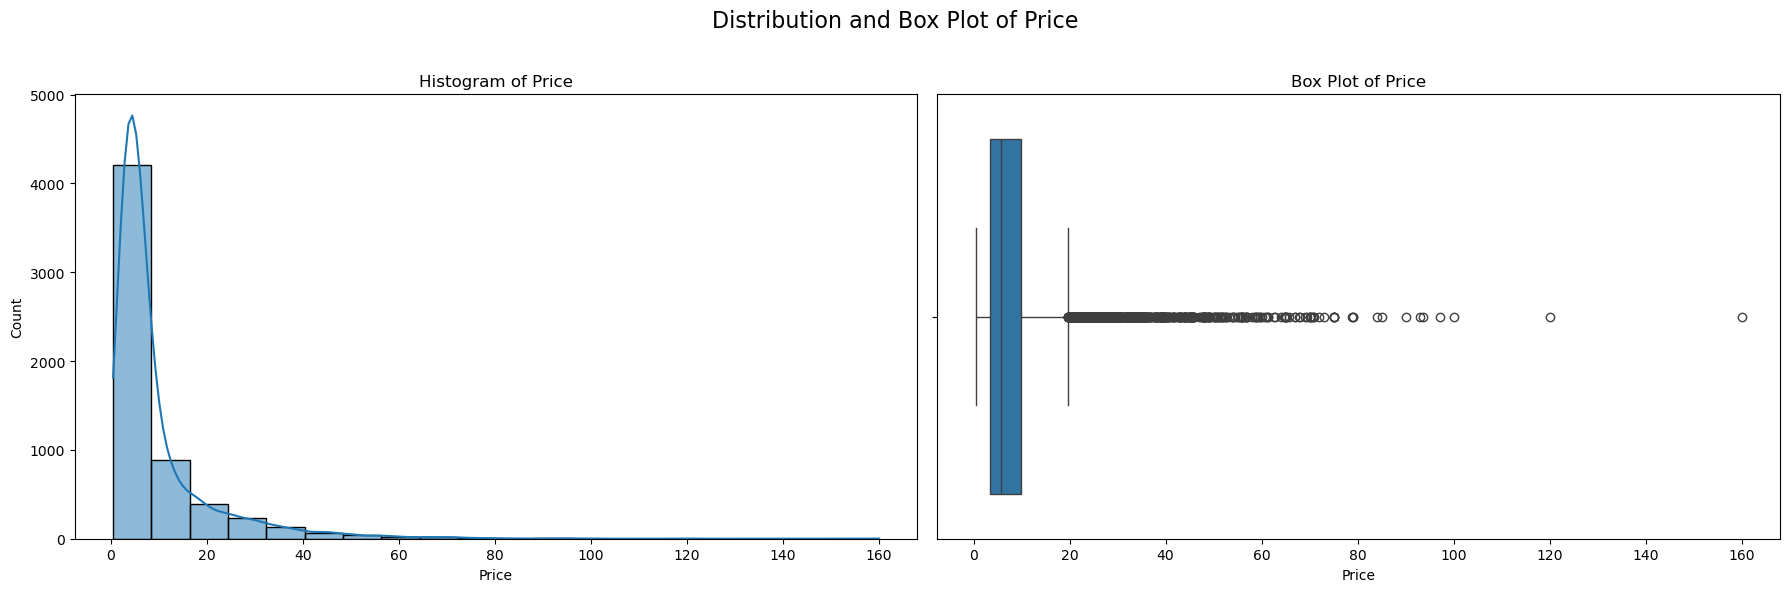

In [6]:
for col in df.select_dtypes(include='number').columns:
    plot_distribution(df, col)

In [7]:
def plot_price_relationship(data, column):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=column, y='Price', data=data)
    plt.title(f'{column} vs. Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

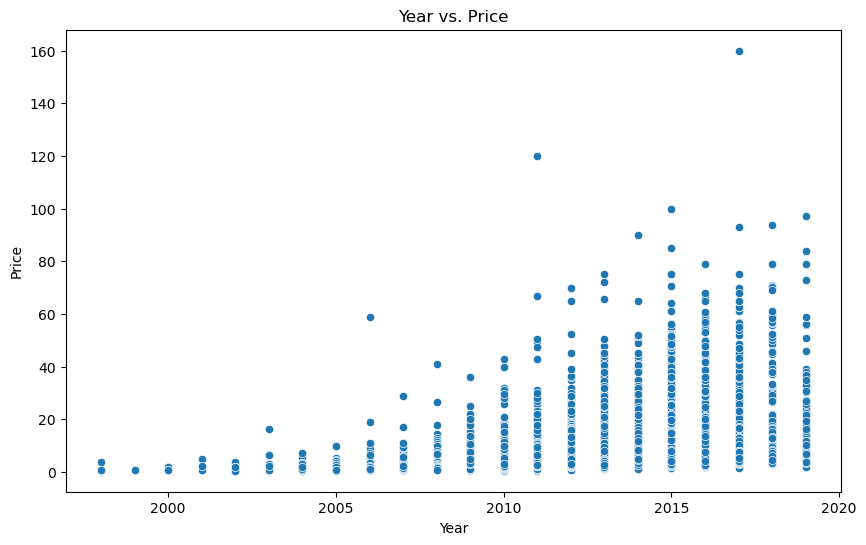

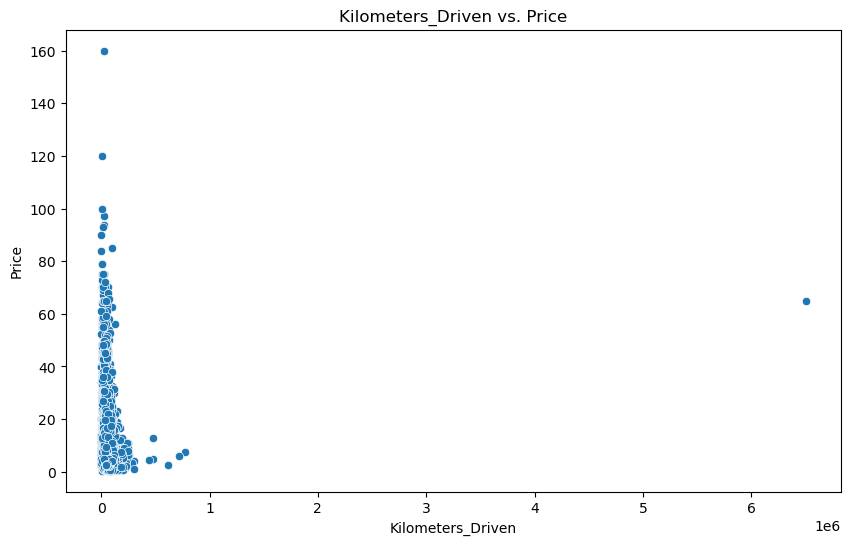

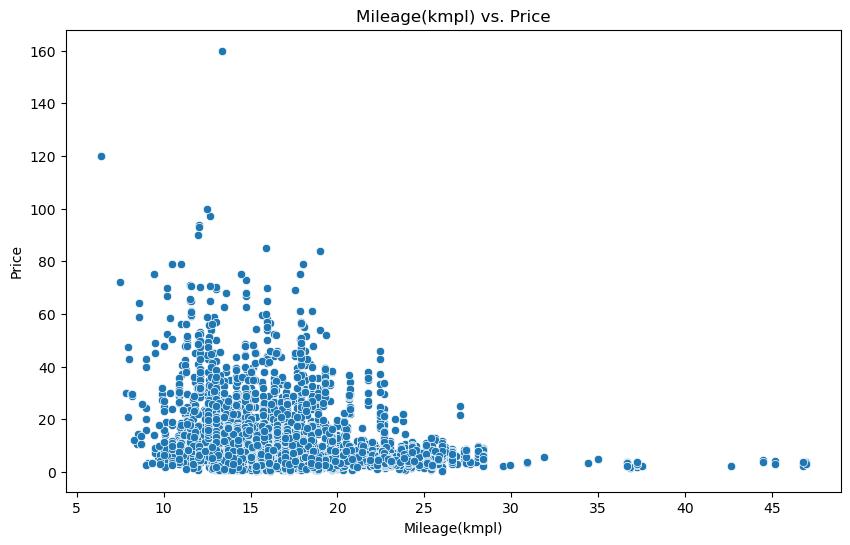

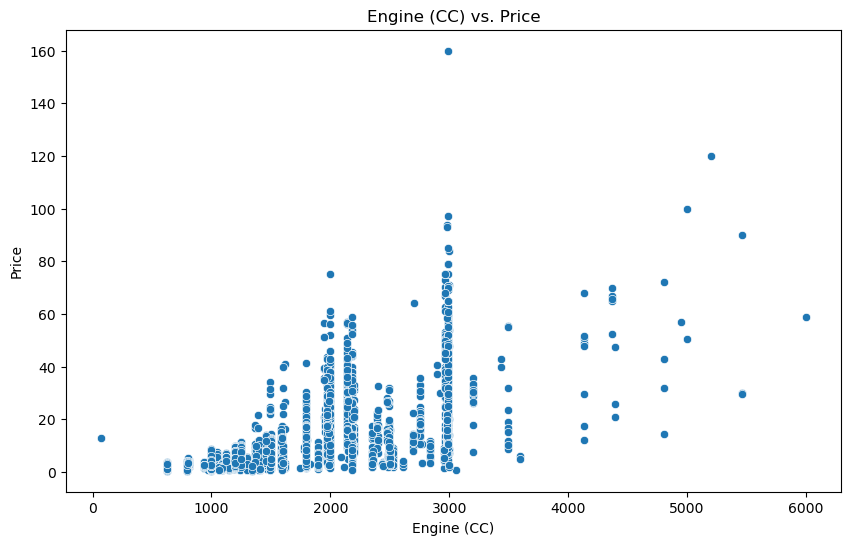

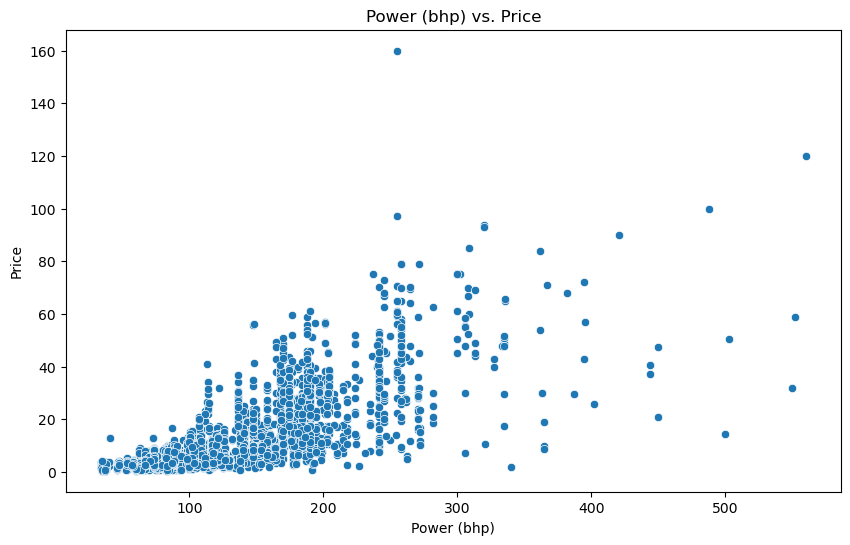

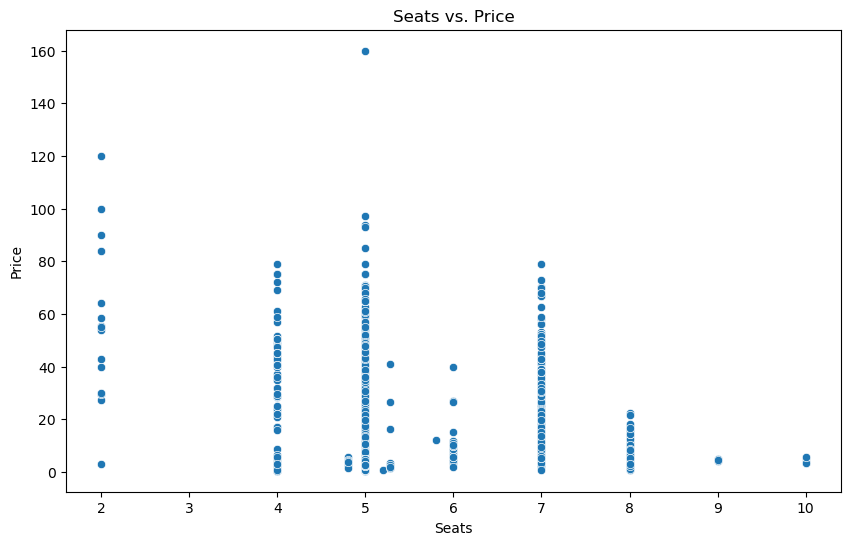

In [8]:
for col in df.select_dtypes(include='number').columns:
    if col != 'Price':
        plot_price_relationship(df, col)

In [9]:
df.describe(include=["O"]).T

,count,unique,top,freq
Name,6019,1876,Mahindra XUV500 W8 2WD,49
Automaker,6019,31,Maruti,1211
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929


In [10]:
def plot_categorical_data(data, column, top_n=10, min_pct=3, max_label_length=15):
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 3, height_ratios=[1, 10], width_ratios=[3, 2, 1])
    fig.suptitle(f'Categorical Data Analysis of {column}', fontsize=20, fontweight='bold', ha='center')

    ax0 = fig.add_subplot(gs[:, 0])
    if column in ['Name', 'Automaker']:
        top_values = data[column].value_counts().nlargest(top_n).sort_values(ascending=False)
        sns.countplot(x=column, data=data[data[column].isin(top_values.index)], ax=ax0, hue=column, palette='tab20', order=top_values.index, legend=False)
    else:
        sorted_values = data[column].value_counts().sort_values(ascending=False)
        sns.countplot(x=column, data=data, ax=ax0, hue=column, palette='tab20', order=sorted_values.index, legend=False)
    ax0.set_title(f'Count Plot of {column}', fontsize=16)
    ax0.set_xlabel(column, fontsize=14)
    ax0.set_ylabel('Count', fontsize=14)
    ax0.tick_params(axis='x', rotation=45)

    ax0.spines['top'].set_visible(False)
    ax0.spines['right'].set_visible(False)

    ax1 = fig.add_subplot(gs[1, 1])
    if column in ['Name', 'Automaker']:
        labels = [label if len(label) <= max_label_length else label[:max_label_length] + '...' for label in top_values.index]
        wedges, texts, autotexts = ax1.pie(top_values, autopct=lambda p: f'{p:.1f}%' if p >= min_pct else '', 
                            colors=sns.color_palette('tab20', len(top_values)), wedgeprops={'edgecolor': 'black'}, labels=['']*len(top_values))
    else:
        labels = [label if len(label) <= max_label_length else label[:max_label_length] + '...' for label in sorted_values.index]
        wedges, texts, autotexts = ax1.pie(sorted_values, autopct=lambda p: f'{p:.1f}%' if p >= min_pct else '', 
                                            colors=sns.color_palette('tab20', len(sorted_values)), wedgeprops={'edgecolor': 'black'}, labels=['']*len(sorted_values))

    for text in autotexts:
        text.set_fontsize(12)

    ax1.set_title(f'Pie Chart of {column}', fontsize=16, pad=20)
    ax1.set_ylabel('')

    ax2 = fig.add_subplot(gs[1, 2])
    ax2.axis('off')
    if column in ['Name', 'Automaker']:
        ax2.legend(wedges, labels, title=column, loc='center', fontsize=12, frameon=True, framealpha=1, edgecolor='black', borderpad=2, borderaxespad=2)
    else:
        ax2.legend(wedges, labels, title=column, loc='center', fontsize=12, frameon=True, framealpha=1, edgecolor='black', borderpad=2, borderaxespad=2)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

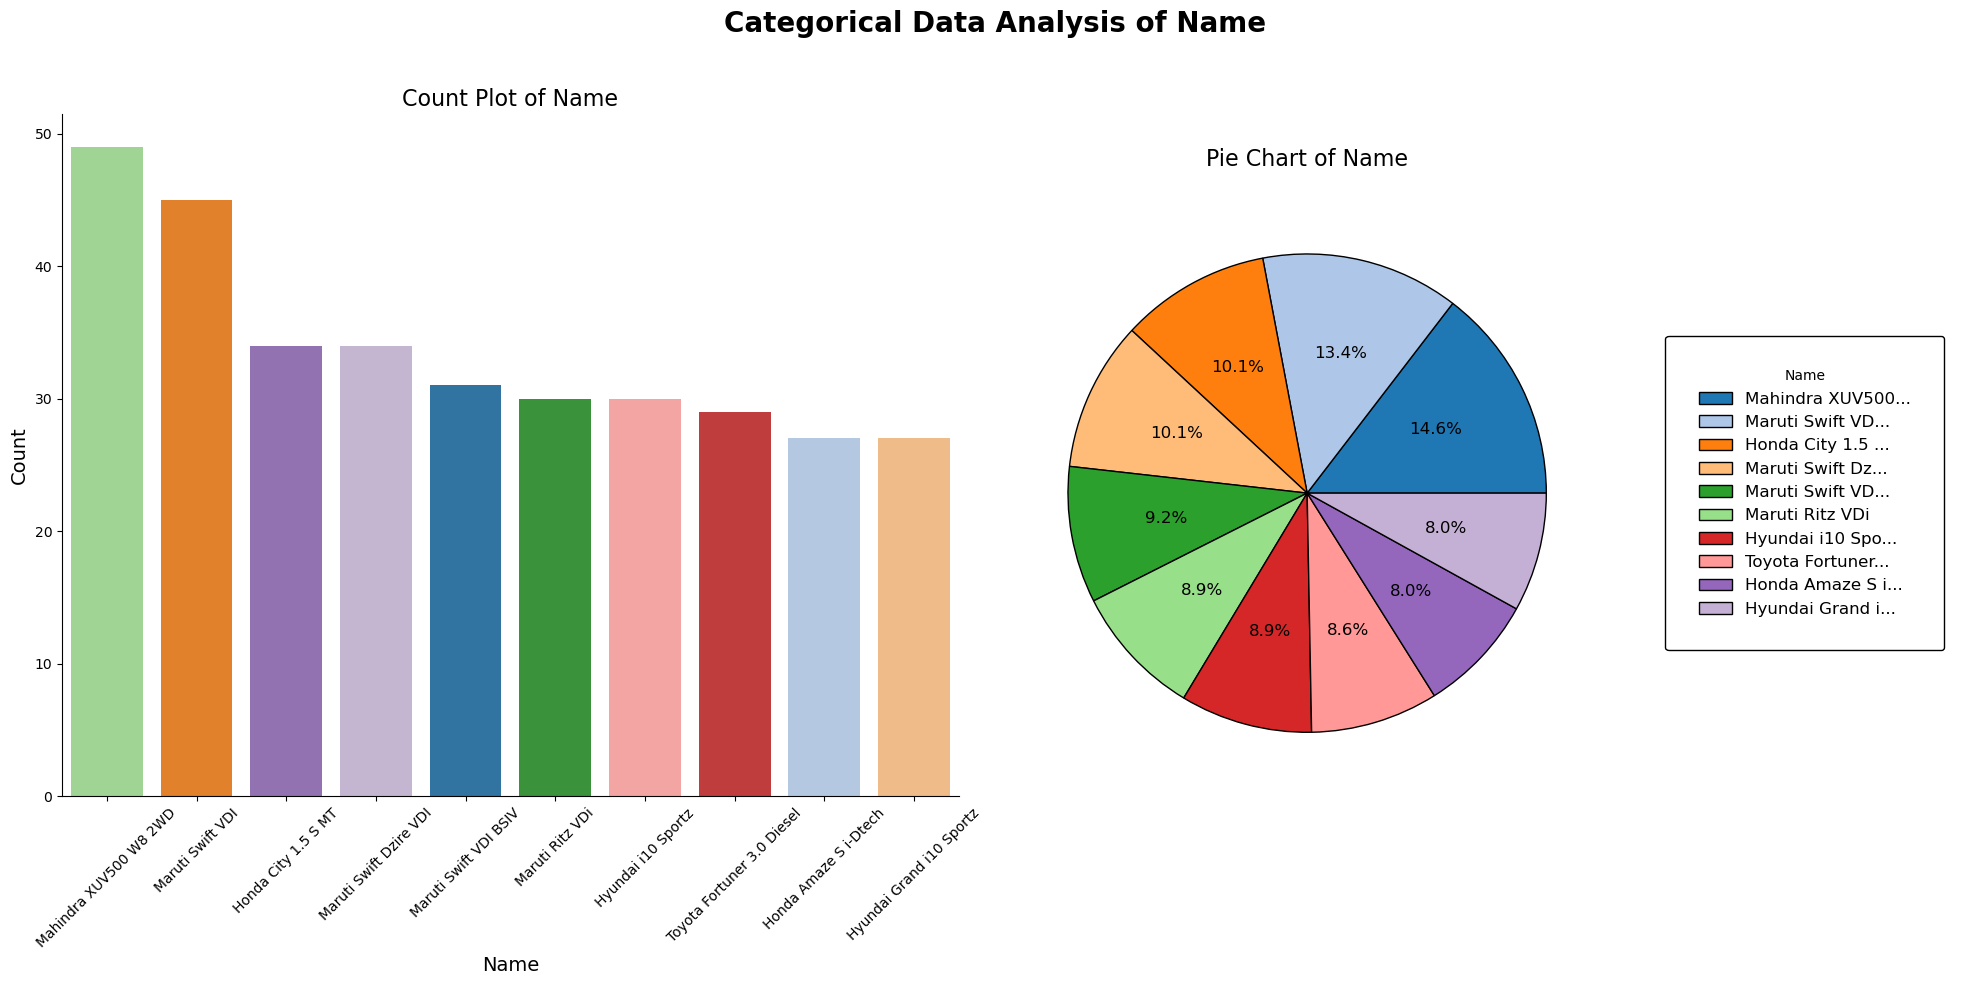

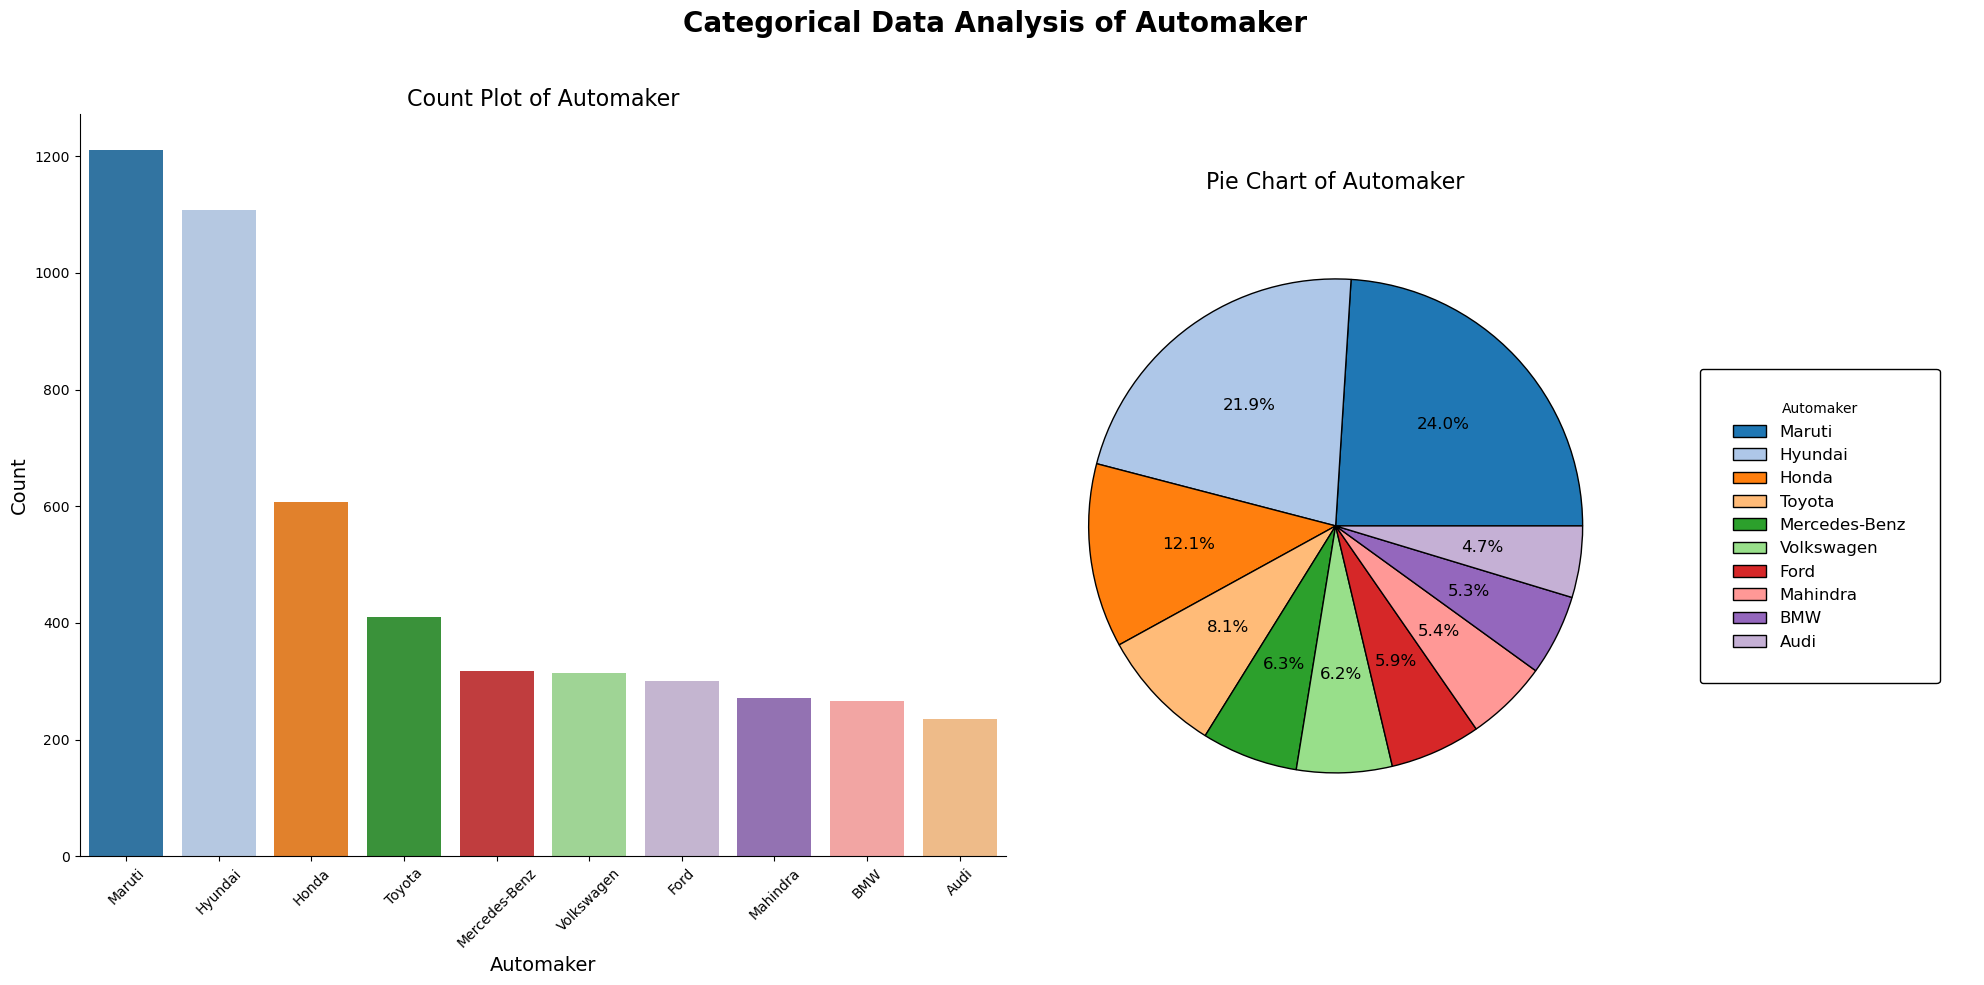

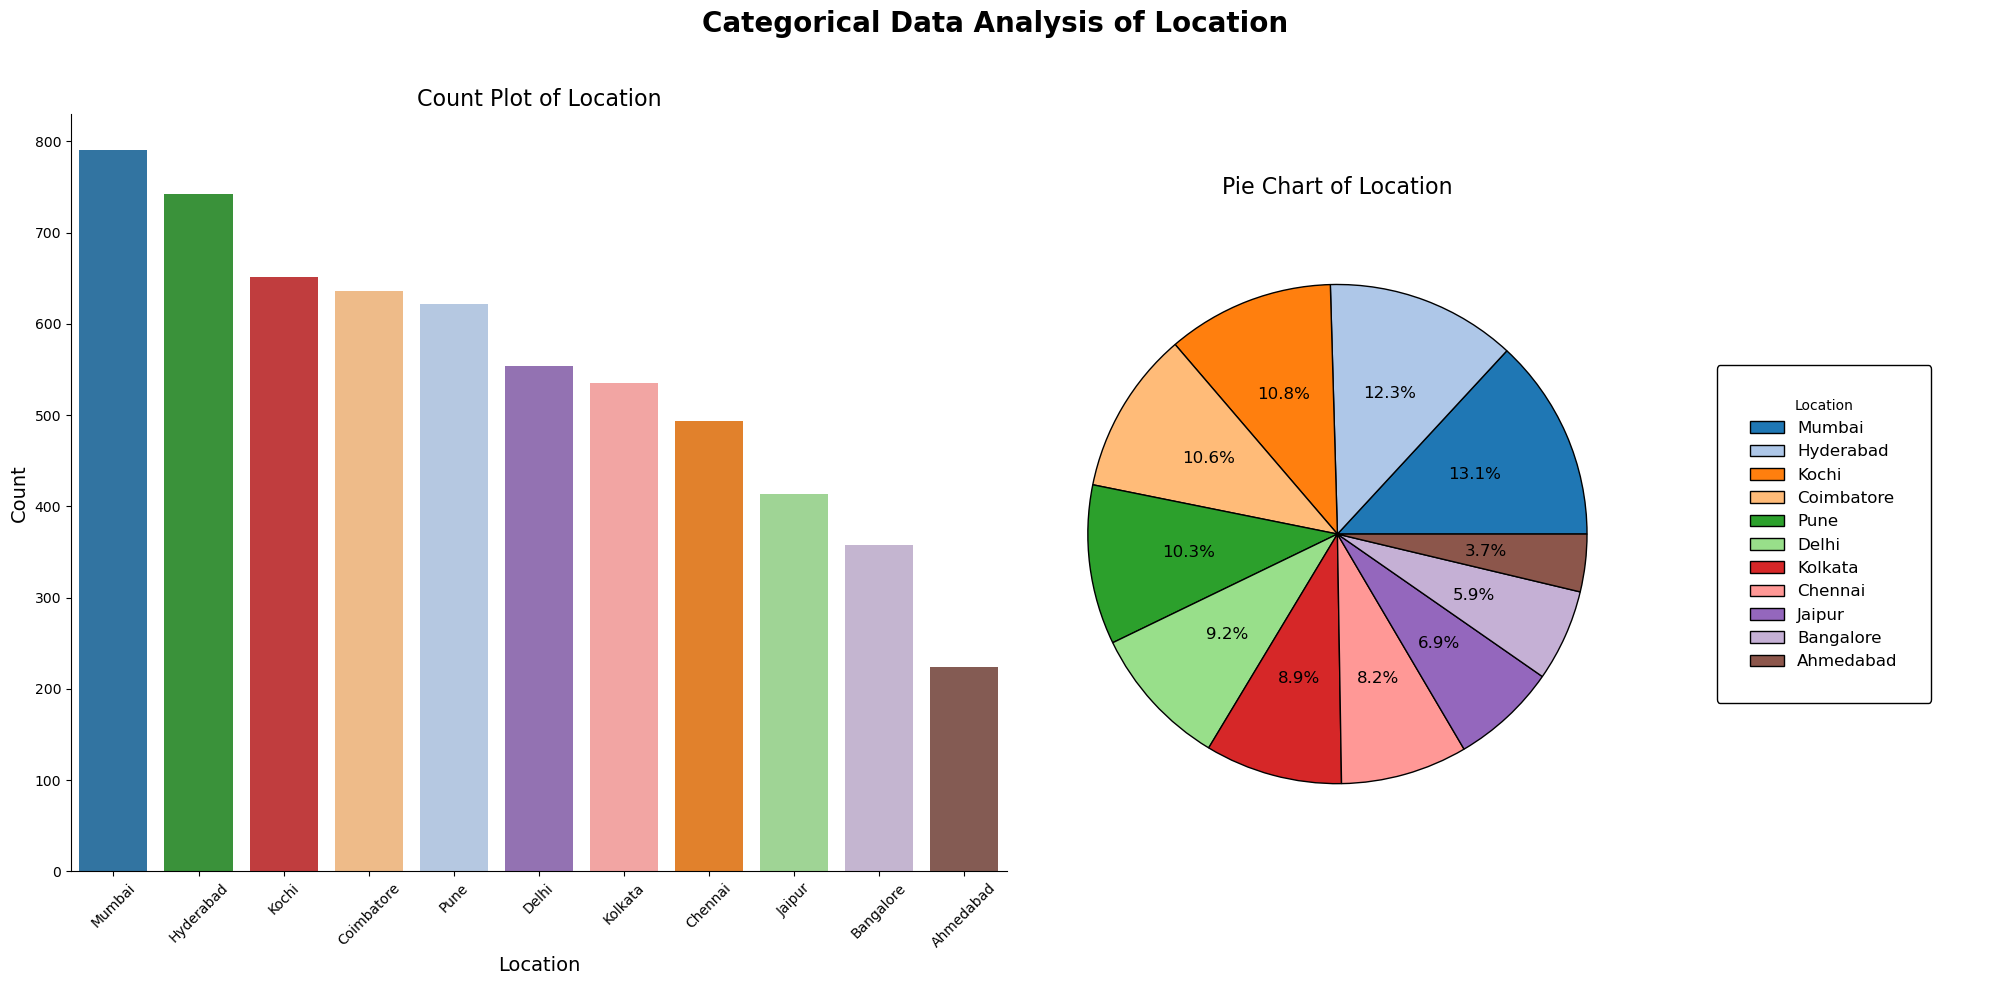

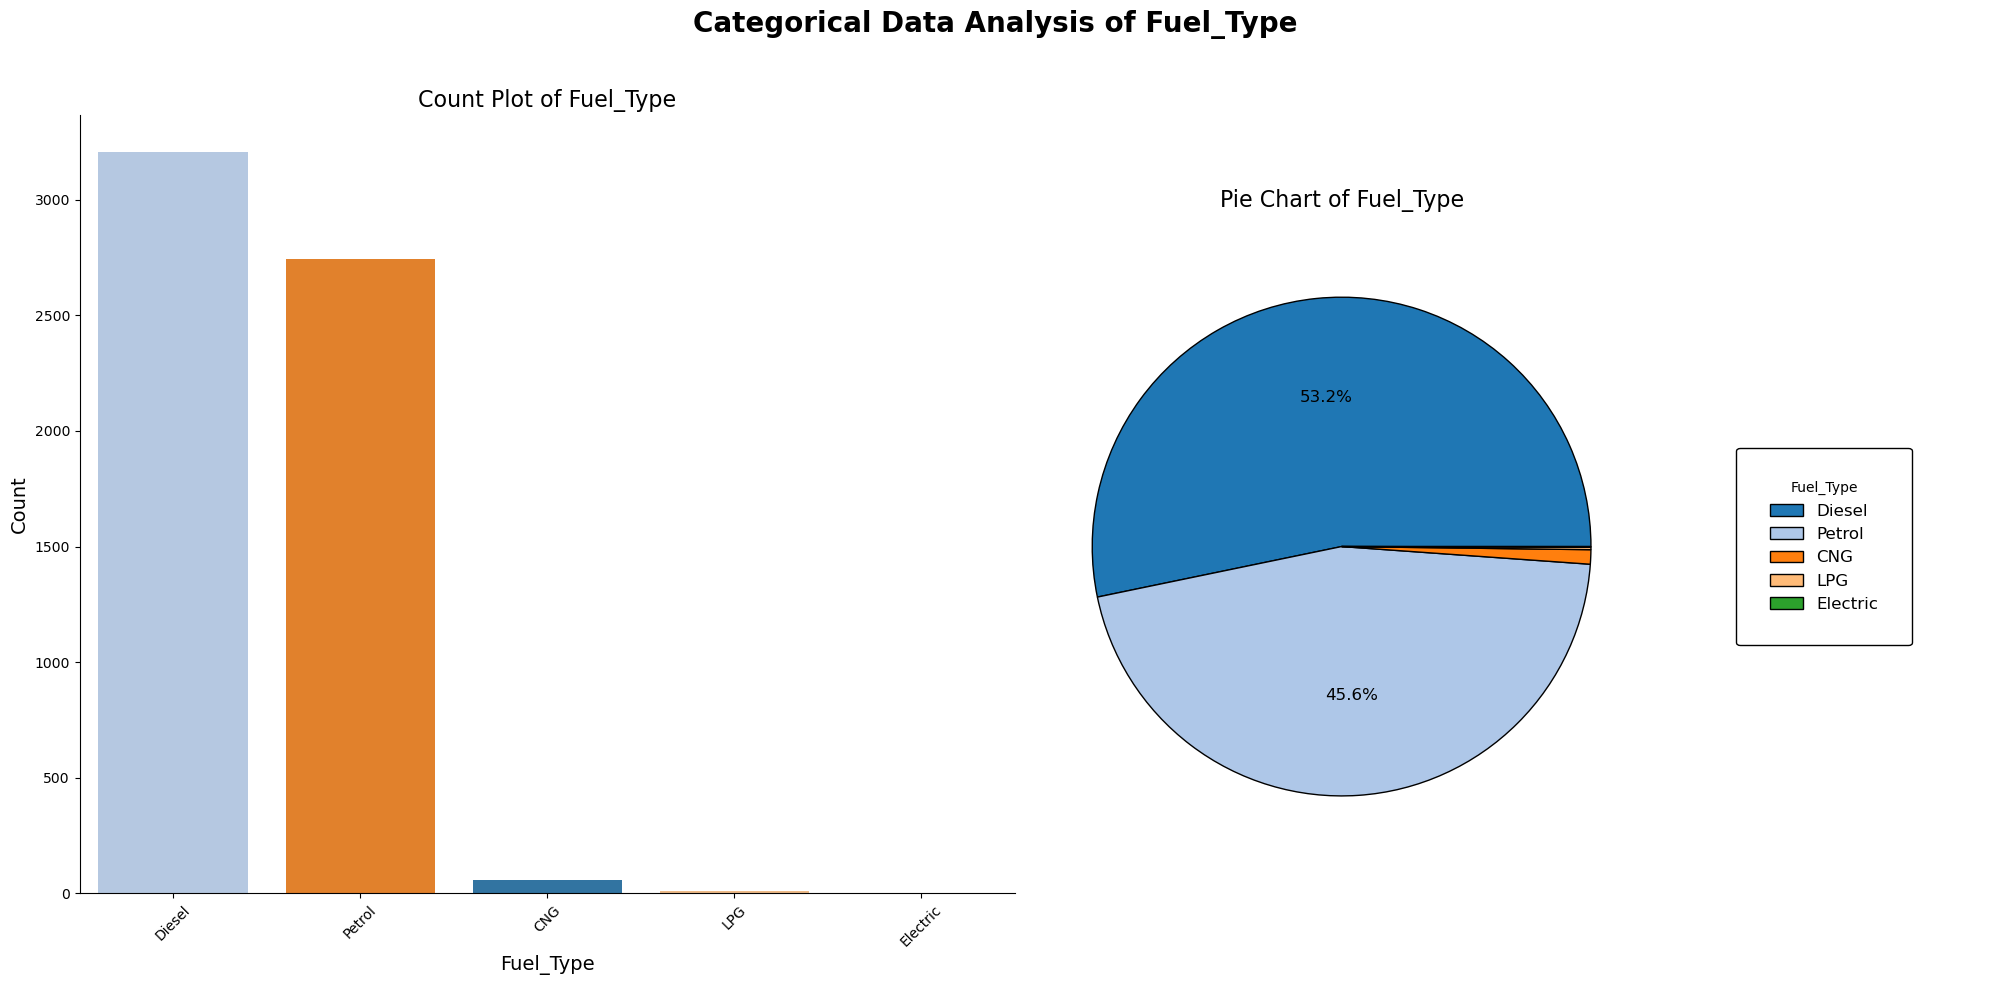

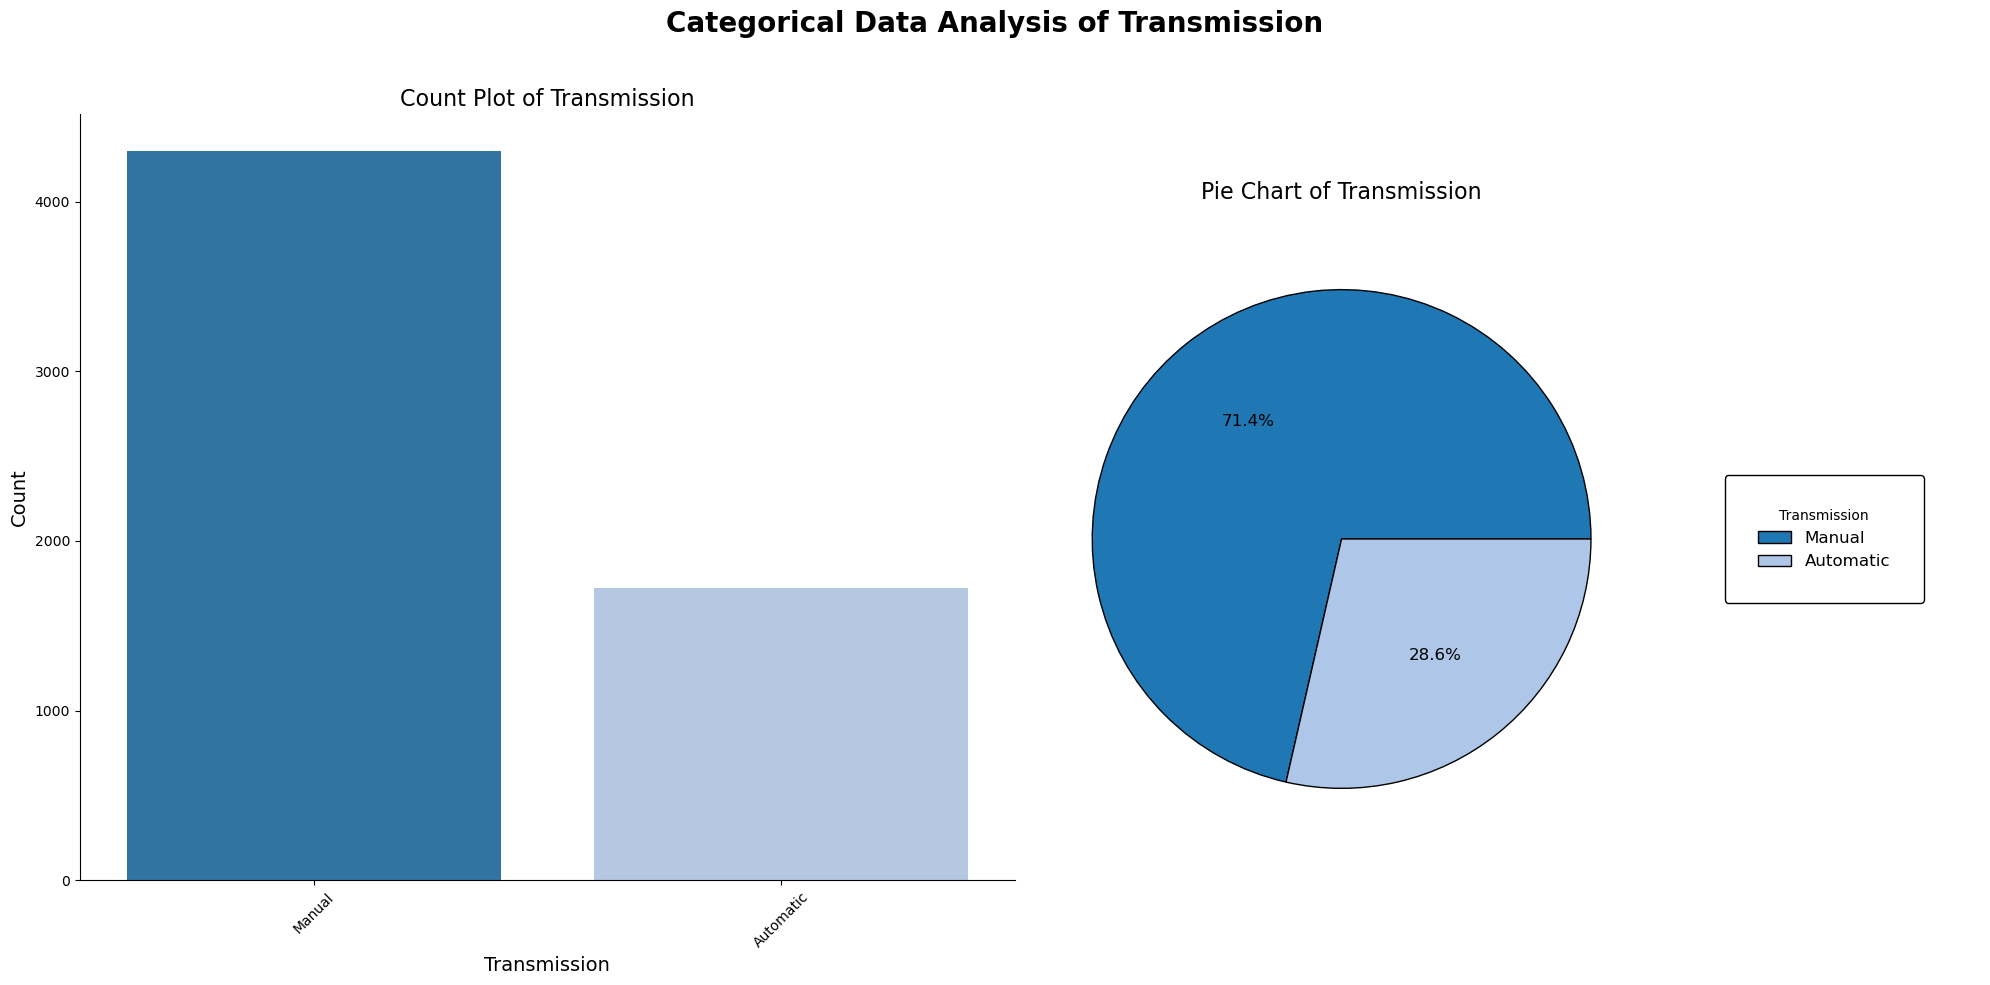

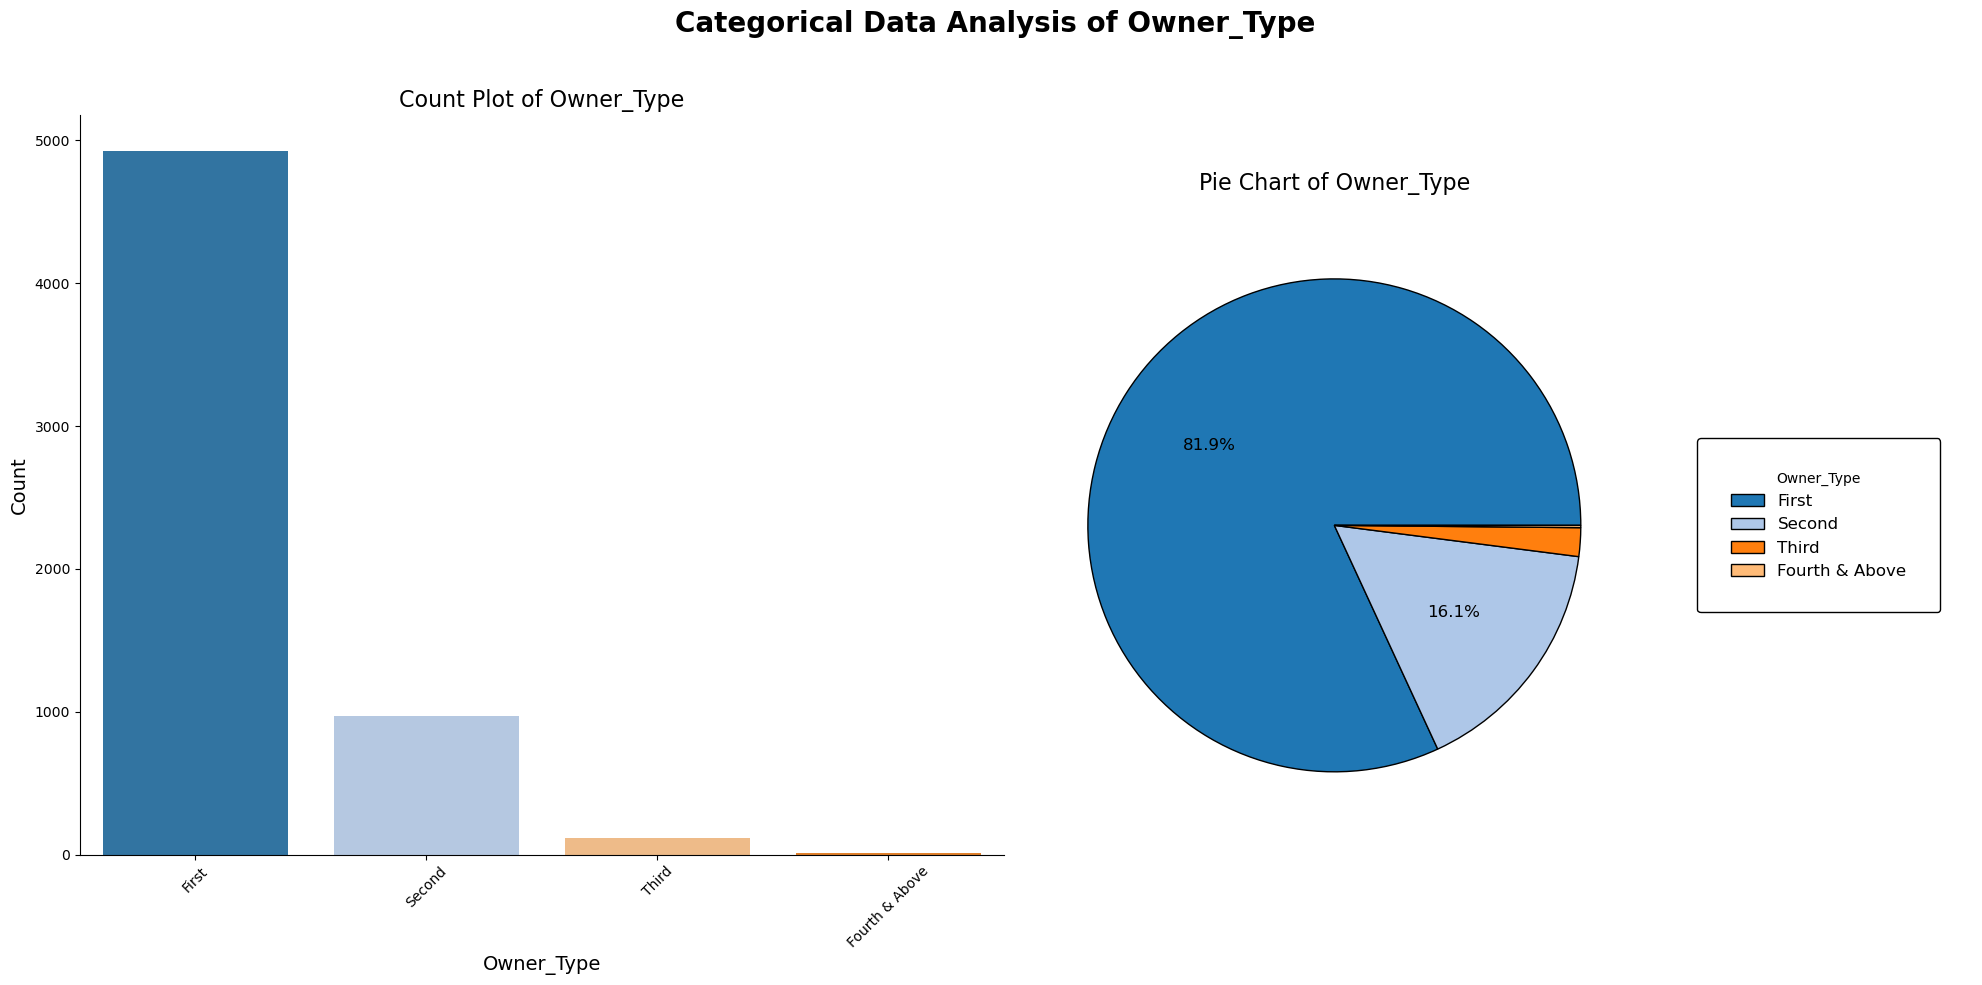

In [11]:
for col in df.select_dtypes(exclude='number').columns:
    plot_categorical_data(df, col)

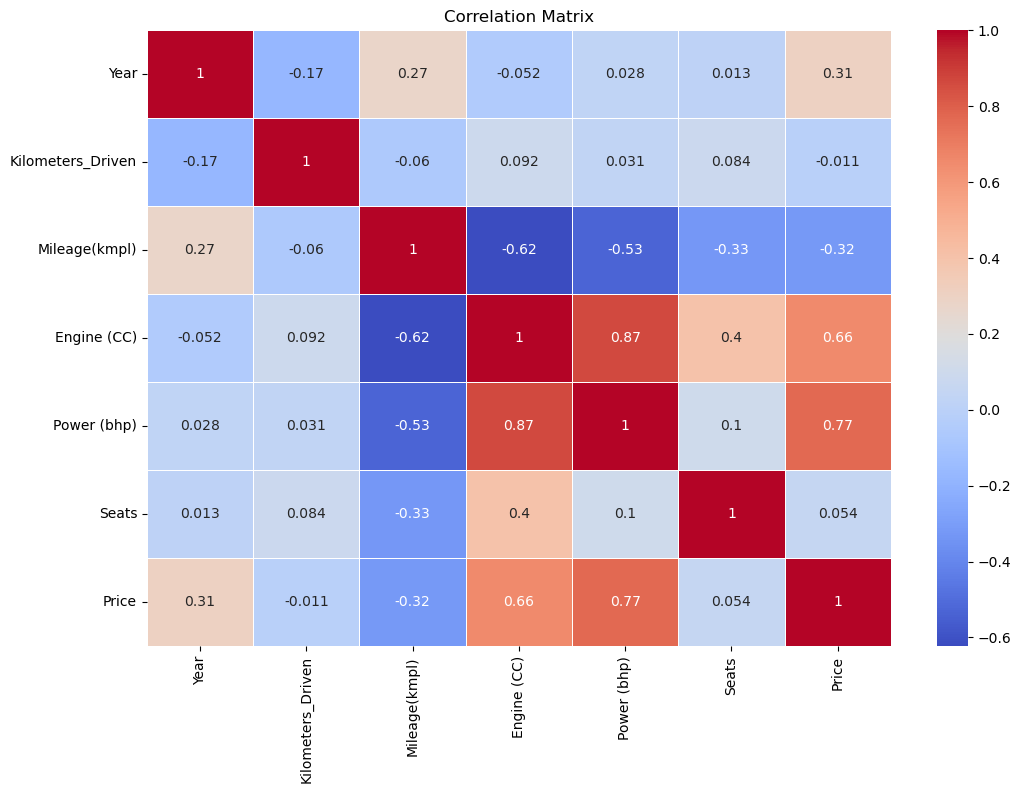

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()